**Name: Methsarani H.E.N.**

**Index: 200395P**

**Detecting and Analyzing Circles in an Image using Blob Detection**

Largest Circle Radius (r): 42.42640687119285


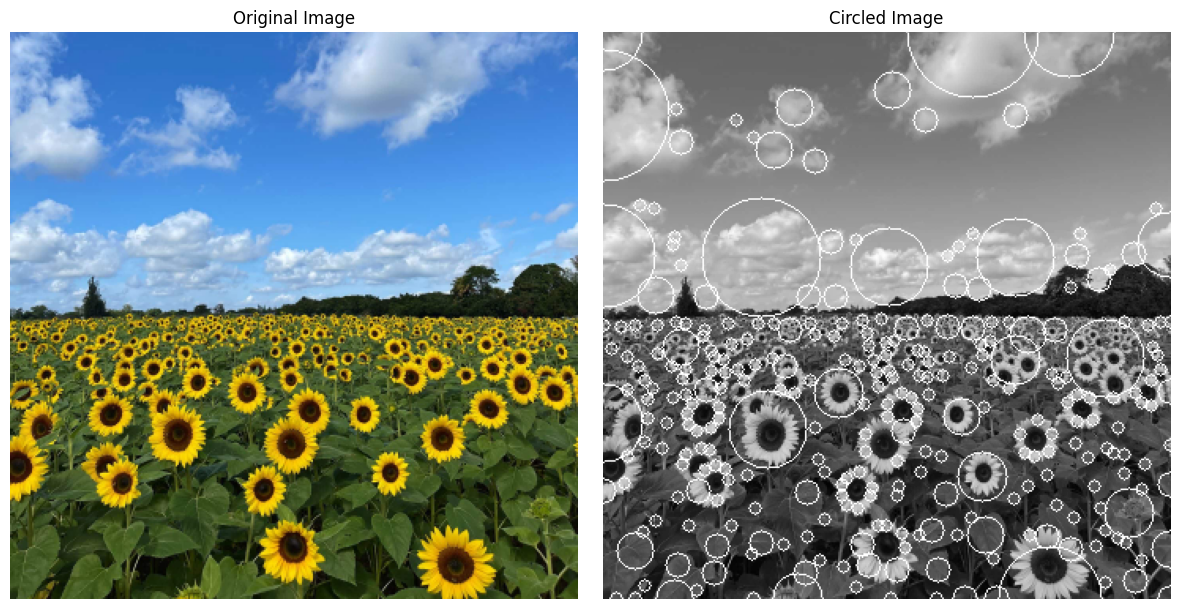

In [1]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
from math import sqrt
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0.5)

# Define parameters for blob detection
min_sigma = 3
max_sigma = 30
threshold = 0.05

# Detect blobs using Laplacian of Gaussians
detected_blobs = blob_log(blurred_image, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
detected_blobs[:, 2] = detected_blobs[:, 2] * sqrt(2)

# Find the largest detected circle
max_radius_index = np.argmax(detected_blobs[:, 2])
largest_circle_params = detected_blobs[max_radius_index]
largest_radius = largest_circle_params[2]
print(f"Largest Circle Radius (r): {largest_radius}")

# Create a copy of the grayscale image to draw circles on
circled_image = gray_image.copy()

# Draw circles on the circled_image
for blob in detected_blobs:
    y, x, r = blob  # Note: Blob format is (y, x, r)
    center = (int(x), int(y))
    radius = int(r)
    cv.circle(circled_image, center, radius, (255, 255, 0), 1)  # Draw circles in white

# Display the original and circled images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

# Circled image
plt.subplot(1, 2, 2)
plt.title("Circled Image")
plt.imshow(circled_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**Superimposing a flag onto an architectural image**

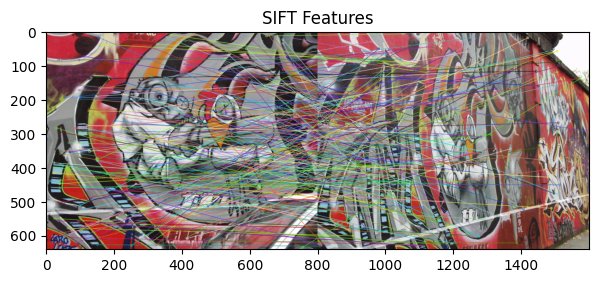

In [60]:
#Question 3 (a)
import cv2 as cv
import matplotlib.pyplot as plt
im1, im5 = cv.imread("img1.ppm"), cv.imread("img5.ppm")

sift = cv.SIFT_create()
key_points_1, descriptors_1 = sift.detectAndCompute(im1,None) #sifting
key_points_2, descriptors_2 = sift.detectAndCompute(im5,None)
bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  #feature matching
matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)

im = cv.drawMatches(im1, key_points_1, im5, key_points_2, matches[:250], im5, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  #draw lines between the matching features of two images
fig, ax = plt.subplots(figsize=(7,7))
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax.set_title("SIFT Features"), ax.imshow(im)
plt.show()

Computed Homography =  [[ 6.06961588e-01  3.54716656e-02  2.23679280e+02]
 [ 2.09923346e-01  1.09726494e+00 -1.25067571e+01]
 [ 4.72186424e-04 -1.13903506e-04  1.00000000e+00]]
Provided Homography =     6.2544644e-01   5.7759174e-02   2.2201217e+02
   2.2240536e-01   1.1652147e+00  -2.5605611e+01
   4.9212545e-04  -3.6542424e-05   1.0000000e+00



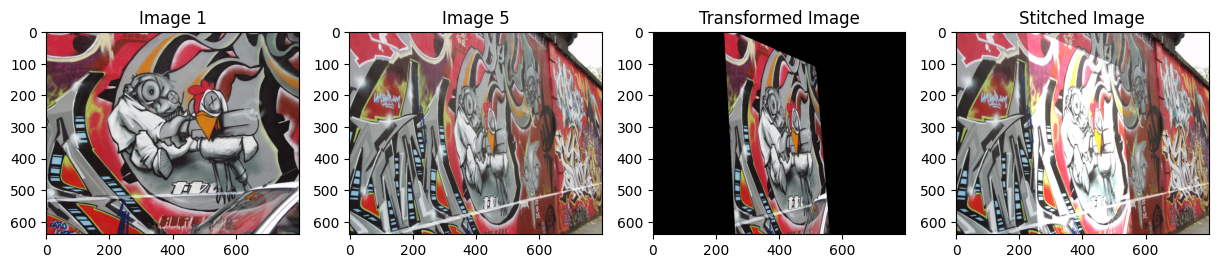

In [61]:
#Question 3 Part (b) and (c)
from random import randint
img2, img3, img4, img1, img5 = cv.imread("img2.ppm"), cv.imread("img3.ppm"), cv.imread("img4.ppm"), cv.imread("img1.ppm"), cv.imread("img5.ppm")
im1, im5, im2, im3, im4 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY), cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.cvtColor(img3, cv.COLOR_BGR2GRAY), cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

ims = [im1, im2, im3, im4, im5]

def random_number(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)):
        m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m):
        return l
    else:
        return random_number(n,t)

def Homography(p1, p2):
    x1, y1, x2, y2, x3, y3, x4, y4 = p2[0], p2[1], p2[2], p2[3], p2[4], p2[5], p2[6], p2[7] 
    x1T, x2T, x3T, x4T = p1[0], p1[1], p1[2], p1[3]
    zero_matrix = np.array([[0], [0], [0]])

    matrix_A = np.concatenate((np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis = 1), np.concatenate((x1T, zero_matrix.T, -x1*x1T), axis = 1),
                            np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis = 1), np.concatenate((x2T, zero_matrix.T, -x2*x2T), axis = 1),
                            np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis = 1), np.concatenate((x3T, zero_matrix.T, -x3*x3T), axis = 1),
                            np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis = 1), np.concatenate((x4T, zero_matrix.T, -x4*x4T), axis = 1)), axis = 0, dtype=np.float64)
    W, v = np.linalg.eig(((matrix_A.T)@matrix_A))
    temph= v[:,np.argmin(W)]
    H = temph.reshape((3,3))
    return H

p, s, e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
Hs = []
for i in range(4):
    sift = cv.SIFT_create()
    key_points_1, descriptors_1 = sift.detectAndCompute(ims[i],None) #sifting
    key_points_2, descriptors_2 = sift.detectAndCompute(ims[i+1],None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  #feature matching
    matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)

    Source_Points = [key_points_1[k.queryIdx].pt for k in matches]
    Destination_Points = [key_points_2[k.trainIdx].pt for k in matches]
    threshold, best_inliers, best_H = 2, 0, 0

    for i in range(N):
        ran_points = random_number(len(Source_Points)-1, 4)
        f_points = []
        for j in range(4):
            f_points.append(np.array([[Source_Points[ran_points[j]][0], Source_Points[ran_points[j]][1], 1]]))

        t_points = []
        for j in range(4):
            t_points.append(Destination_Points[ran_points[j]][0]) 
            t_points.append(Destination_Points[ran_points[j]][1])

        H = Homography(f_points,t_points)
        
        inliers = 0 
        for k in range(len(Source_Points)):
            X = [Source_Points[k][0], Source_Points[k][1], 1]
            HX = H @ X
            HX /= HX[-1]
            err = np.sqrt(np.power(HX[0]-Destination_Points[k][0], 2) + np.power(HX[1]-Destination_Points[k][1], 2))
            if err < threshold:
                inliers +=1
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H 
    Hs.append(best_H)

H1_H5 = Hs[3] @ Hs[2] @ Hs[1] @ Hs[0]
H1_H5 /= H1_H5[-1][-1]

print("Computed Homography = ", H1_H5)
print("Provided Homography = ", open("H1to5p",'r').read())

transformed_im = cv.warpPerspective(img1, H1_H5, (np.shape(img5)[1], np.shape(img5)[0]))
final = cv.add(img5, transformed_im)

fig, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB)), ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed_im,cv.COLOR_BGR2RGB)), ax[2].set_title("Transformed Image")
ax[3].imshow(cv.cvtColor(final,cv.COLOR_BGR2RGB)), ax[3].set_title("Stitched Image")
plt.show()

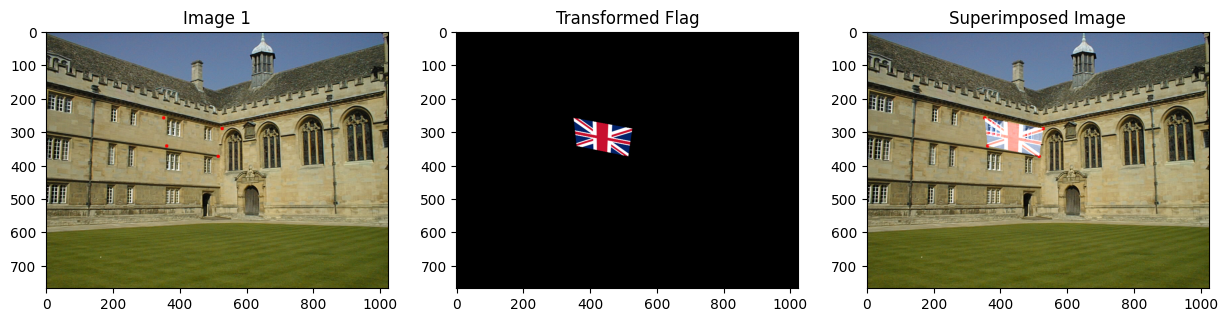

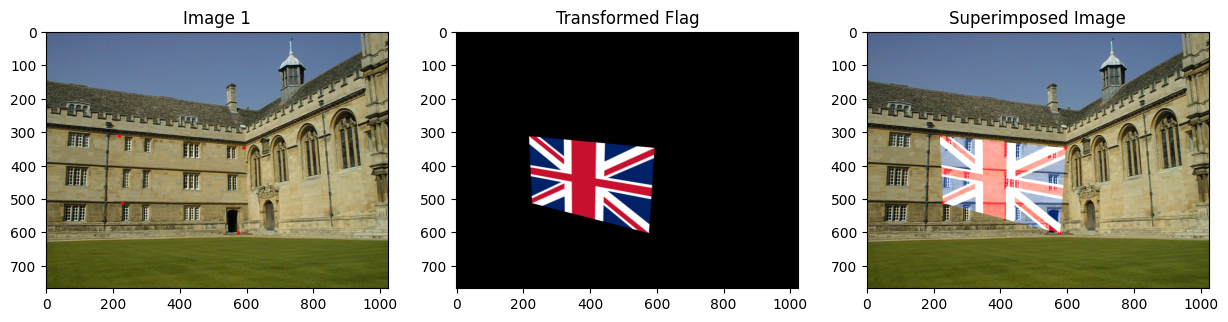

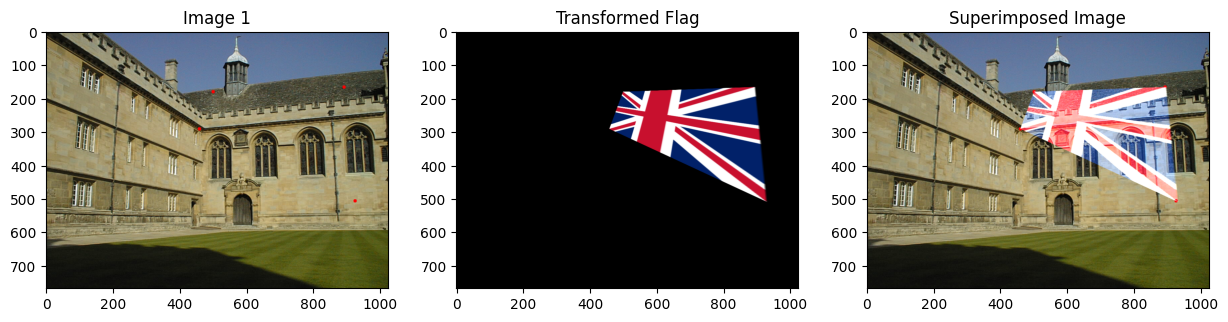

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

corners = []

def mouse_click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN and len(corners) < 4:
        corners.append([x, y])
        # Draw a red dot where the user clicked
        cv.circle(im, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Wadham College", im)

ims = ["001.jpg","003.jpg", "005.jpg"]

for i in range(3):
    im = cv.imread(ims[i])
    cv.imshow("Wadham College", im)
    corners = []  # Reset corners for each image
    cv.setMouseCallback("Wadham College", mouse_click)
    
    # Wait for mouse clicks until four points are selected or 'q' is pressed
    while len(corners) < 4:
        key = cv.waitKey(1) & 0xFF
        if key == ord("q"):  # Press 'q' to exit without selecting all points
            break
        elif key == 27:  # Press 'Esc' to exit the program
            cv.destroyAllWindows()
            exit(0)
    
    cv.destroyAllWindows()

    if len(corners) < 4:
        continue  # Skip processing if not enough points are selected

    h, w = np.shape(im)[0], np.shape(im)[1]
    zero_matrix = np.array([[0], [0], [0]])

    x1, y1, x2, y2, x3, y3, x4, y4 = (
        corners[0][0],
        corners[0][1],
        corners[1][0],
        corners[1][1],
        corners[2][0],
        corners[2][1],
        corners[3][0],
        corners[3][1],
    )

    flag_im = cv.imread("Flag_of_the_United_Kingdom_(1-2).svg.png")
    fh, fw = np.shape(flag_im)[0], np.shape(flag_im)[1]
    f1, f2, f3, f4 = np.array([[0, 0, 1]]), np.array([[fw - 1, 0, 1]]), np.array([[fw - 1, fh - 1, 1]]), np.array([[0, fh - 1, 1]])

    matrix_A = np.concatenate(
        (
            np.concatenate((zero_matrix.T, f1, -y1 * f1), axis=1),
            np.concatenate((f1, zero_matrix.T, -x1 * f1), axis=1),
            np.concatenate((zero_matrix.T, f2, -y2 * f2), axis=1),
            np.concatenate((f2, zero_matrix.T, -x2 * f2), axis=1),
            np.concatenate((zero_matrix.T, f3, -y3 * f3), axis=1),
            np.concatenate((f3, zero_matrix.T, -x3 * f3), axis=1),
            np.concatenate((zero_matrix.T, f4, -y4 * f4), axis=1),
            np.concatenate((f4, zero_matrix.T, -x4 * f4), axis=1),
        ),
        axis=0,
        dtype=np.float64,
    )

    W, v = np.linalg.eig((matrix_A.T) @ matrix_A)
    temph = v[:, np.argmin(W)]
    H = temph.reshape((3, 3))
    transformed_flag = cv.warpPerspective(flag_im, H, (w, h))
    final = cv.add(transformed_flag, im)
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].set_title("Image 1")
    ax[1].imshow(cv.cvtColor(transformed_flag, cv.COLOR_BGR2RGB))
    ax[1].set_title("Transformed Flag")
    ax[2].imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))
    ax[2].set_title("Superimposed Image")
    plt.show()


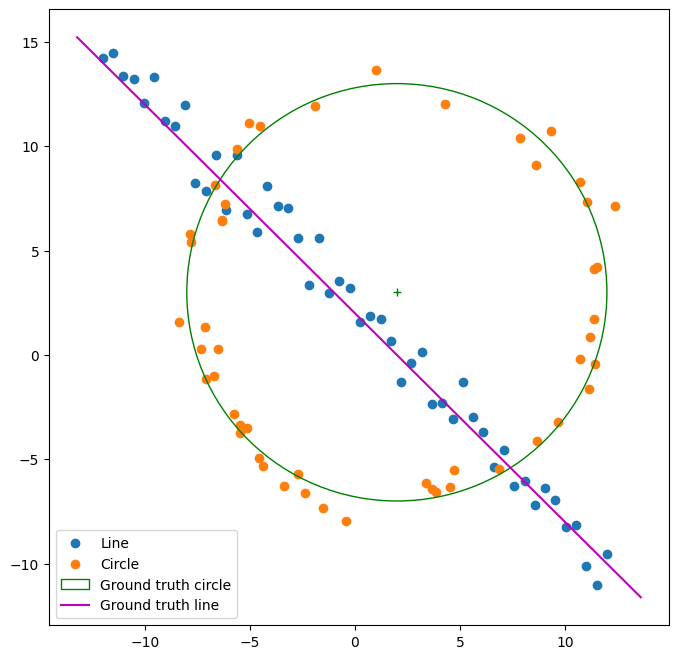

In [154]:

import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib

# Set the random seed for reproducibility
np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()
plt.show()



Best Line Parameters (a, b, d): 0.7699875933235546 0.6380588578867943 -1.7731536341322092
Number of Inliers: 23


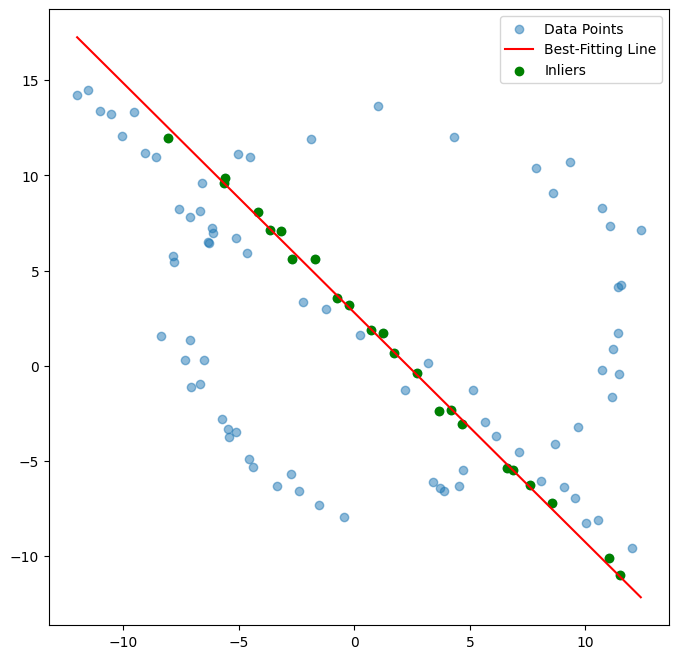

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to fit a line to a set of points given the line parameters (a, b, d)
def fit_line(a, b, d, points):
    x, y = points[:, 0], points[:, 1]
    distances = np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)
    return distances

# Define a function to calculate the distance from a point to the line
def distance_to_line(a, b, d, x, y):
    return np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

# Define RANSAC parameters
max_iterations = 1000  # Maximum number of iterations
threshold = 0.5  # Threshold for inlier detection (adjust as needed)
min_inliers = 20  # Minimum number of inliers required for consensus

best_line = None
best_inliers = []

# Implement RANSAC
for _ in range(max_iterations):
    # Randomly select two points from the dataset
    sample_indices = np.random.choice(len(X), 2, replace=False)
    p1, p2 = X[sample_indices]

    # Fit a line to the two sampled points
    a = p2[1] - p1[1]
    b = p1[0] - p2[0]
    
    # Normalize the (a, b) vector to satisfy the constraint
    norm_ab = np.sqrt(a**2 + b**2)
    a /= norm_ab
    b /= norm_ab

    d = -(a * p1[0] + b * p1[1])
    
    # Calculate distances to the line for all points
    distances = fit_line(a, b, d, X)
    
    # Find inliers (points within the threshold)
    inliers = X[distances < threshold]
    
    # Check if the current consensus has more inliers than the best one
    if len(inliers) > len(best_inliers):
        best_line = (a, b, d)
        best_inliers = inliers
    
    # Check for termination based on the number of inliers
    if len(best_inliers) >= min_inliers:
        break

# Retrieve the best line parameters
a, b, d = best_line

# Display the best-fitting line and inliers
print("Best Line Parameters (a, b, d):", a, b, d)
print("Number of Inliers:", len(best_inliers))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for the data points
ax.scatter(X[:, 0], X[:, 1], label='Data Points', alpha=0.5)

# Plot the best-fitting line
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min = (-a * x_min - d) / b
y_max = (-a * x_max - d) / b
ax.plot([x_min, x_max], [y_min, y_max], color='red', label='Best-Fitting Line')

# Highlight inliers
ax.scatter(best_inliers[:, 0], best_inliers[:, 1], c='green', label='Inliers')

# Set legend
ax.legend()

# Show the plot
plt.show()


Best Circle Parameters (x0, y0, radius): -0.5051641897495562 4.188523608796936 7.871070577079244
Number of Circle Inliers on Remnant: 21


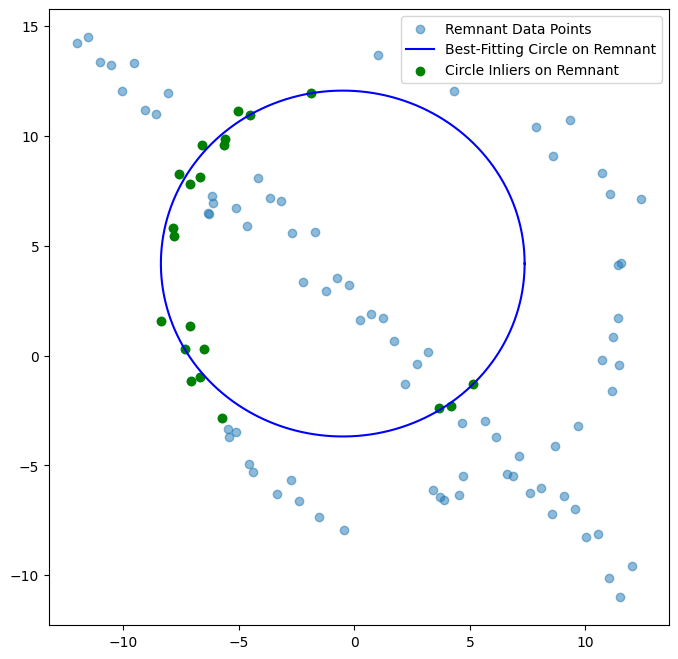

In [156]:
# Subtract the best line consensus (remnant)
remnant_indices = np.setdiff1d(np.arange(len(X)), best_inliers)

# Extract the remnant points
remnant_x, remnant_y = X[remnant_indices][:, 0], X[remnant_indices][:, 1]

# RANSAC parameters for circle fitting on the remnant
threshold_circle = 1.0  # Adjust the threshold as needed
min_inliers_circle = 20  # Minimum number of inliers required for consensus on the circle

# Function to fit a circle to points and calculate inliers
def fit_circle_ransac(points, N, threshold):
    best_circle = None
    best_inliers = []

    for _ in range(N):
        # Randomly select three points from the remnant dataset
        sample_indices = np.random.choice(len(points), 3, replace=False)
        p1, p2, p3 = points[sample_indices]

        # Fit a circle to the three sampled points
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        x0, y0, radius = finding_circle(x1, y1, x2, y2, x3, y3)

        # Calculate distances to the circle for all remnant points
        distances = distance(x0, y0, radius, points[:, 0], points[:, 1])

        # Find inliers (points within the threshold)
        inliers = points[distances < threshold]

        # Check if the current consensus has more inliers than the best one
        if len(inliers) > len(best_inliers):
            best_circle = (x0, y0, radius)
            best_inliers = inliers

        # Check for termination based on the number of inliers
        if len(best_inliers) >= min_inliers_circle:
            break

    return best_circle, best_inliers

# RANSAC circle fitting on the remnant
best_circle_params, best_circle_inliers = fit_circle_ransac(np.column_stack((remnant_x, remnant_y)), max_iterations, threshold_circle)

# Retrieve the best circle parameters
x0_circle, y0_circle, radius_circle = best_circle_params

# Display the best-fitting circle and inliers on the remnant
print("Best Circle Parameters (x0, y0, radius):", x0_circle, y0_circle, radius_circle)
print("Number of Circle Inliers on Remnant:", len(best_circle_inliers))

# Create a figure and axis for the circle on the remnant
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for the remnant data points
ax.scatter(remnant_x, remnant_y, label='Remnant Data Points', alpha=0.5)

# Plot the best-fitting circle on the remnant
angle = np.linspace(0, 2 * np.pi, 360)
x_circle = x0_circle + radius_circle * np.cos(angle)
y_circle = y0_circle + radius_circle * np.sin(angle)
ax.plot(x_circle, y_circle, color='blue', label='Best-Fitting Circle on Remnant')

# Highlight inliers on the remnant
ax.scatter(best_circle_inliers[:, 0], best_circle_inliers[:, 1], c='green', label='Circle Inliers on Remnant')

# Set legend for the remnant
ax.legend()

# Show the plot for the circle on the remnant
plt.show()


total points =  50
N =  35


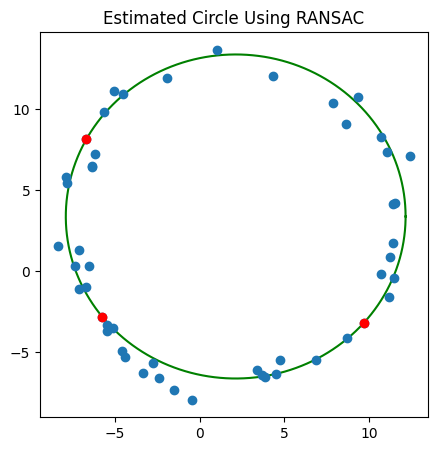

In [157]:
#Part (a)
total_points = len(x)
print("total points = ", total_points)
p, s, e = 0.99, 3, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
print("N = ", N)

def finding_circle(x1, y1, x2, y2, x3, y3):
    A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    B = (x1**2 + y1**2)*(y2-y3) + (x2**2 + y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)  
    C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
    D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2 + y3**2)*(x2*y1-x1*y2)
    H, K, R = B/(2*A), -C/(2*A), np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
    return [H,K,R]

def drawing_circle(x0,y0,r,px,py):
    angle = np.linspace(0, 2*np.pi, 360)
    x_x, y_y = x0 + r*np.cos(angle), y0 + r*np.sin(angle)
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.plot(x_x, y_y, color = "green"), ax.plot(x, y, "o"), ax.plot(px, py, "o", color = "red"), ax.set_title("Estimated Circle Using RANSAC")
    plt.show()

def num_generator(n):
    p_1, p_2, p_3 = np.random.randint(n, size=3)
    if p_1==p_2 or p_2==p_3 or p_1==p_3:
        return num_generator(n)
    else:
        return p_1, p_2, p_3

def distance(h, k, r, x, y):
    return (np.abs(np.sqrt((x-h)**2+(y-k)**2)-r))

x, y = X[:50,0], X[:50,1]
ransac = []
max_inliers = 0
inlier_set = []
for i in range(total_points):
    p1, p2, p3 = num_generator(total_points)
    inliers = 0
    x0, y0, radius = finding_circle(x[p1], y[p1], x[p2], y[p2], x[p3], y[p3])
    inlier_set = []
    for j in range(total_points):
        d = distance(x0, y0, radius,x[j],y[j])
        if d<1:
            inliers += 1
            inlier_set.append([x[j], y[j]])

    outliers = total_points - inliers
    if inliers > max_inliers:
        ransac = [p1, p2, p3]
        max_inliers = inliers
        ransac_center_x, ransac_center_y, ransac_radius = x0, y0, radius
        ransac_set = inlier_set

drawing_circle(ransac_center_x, ransac_center_y, ransac_radius,[x[ransac[0]], x[ransac[1]], x[ransac[2]]], [y[ransac[0]], y[ransac[1]], y[ransac[2]]])

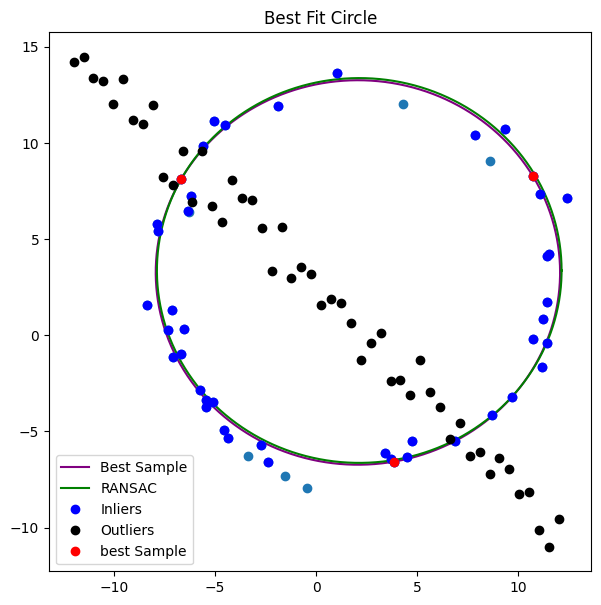

In [158]:
ransac_x, ransac_y = [], []
for i in ransac_set:
    ransac_x.append(i[0])
    ransac_y.append(i[1])

total_points = len(ransac_set)
best = []
max_inliers = 0

for i in range(N):
    po1, po2, po3 = num_generator(total_points)
    inliers = 0
    center_x_coord, center_y_coord, rad = finding_circle(ransac_x[po1], ransac_y[po1], ransac_x[po2], ransac_y[po2], ransac_x[po3], ransac_y[po3])

    for j in range(total_points):
        d = distance(center_x_coord, center_y_coord, rad, ransac_x[j], ransac_y[j])
        if d<1:
            inliers += 1
    if inliers > max_inliers:
        best = [po1, po2, po3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x_coord, center_y_coord, rad

angle = np.linspace(0, 2*np.pi, 360)
x_x, y_y = best_center_x + best_radius*np.cos(angle), best_center_y + best_radius*np.sin(angle)
r_x, r_y = ransac_center_x + ransac_radius*np.cos(angle), ransac_center_y + ransac_radius*np.sin(angle)

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x_x, y_y, color = "purple", label = "Best Sample"), ax.plot(r_x, r_y, color = "green", label = "RANSAC"), ax.plot(x, y, "o")
ax.plot(ransac_x, ransac_y, "o", color = "blue", label = "Inliers"), ax.plot(X[50:,0], X[50:,1], "o", color = "black", label = "Outliers"), ax.plot([ransac_x[best[0]], ransac_x[best[1]], ransac_x[best[2]]], [ransac_y[best[0]], ransac_y[best[1]], ransac_y[best[2]]], "o", color = "red", label = "best Sample")
ax.legend(), ax.set_title("Best Fit Circle")
plt.show()

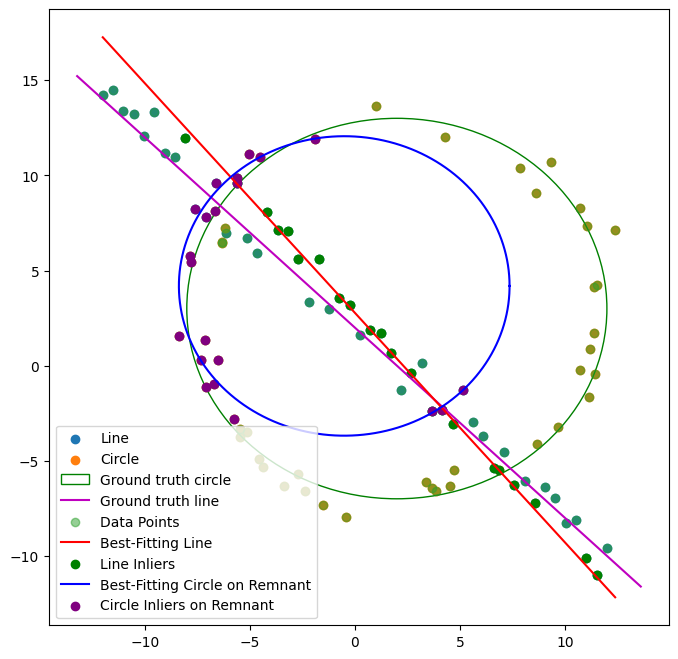

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate data for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x_circ = x0_gt + (r + n) * np.cos(t)
y_circ = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x_circ.reshape(half_n, 1), y_circ.reshape(half_n, 1)))

# Generate data for the line
s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine data points
X = np.vstack((X_circ, X_line))

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')

# Scatter plot for the circle
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Ground truth line
x_min, x_max = ax.get_xlim()
x_gt = np.array([x_min, x_max])
y_gt = m * x_gt + b
plt.plot(x_gt, y_gt, color='m', label='Ground truth line')

# Define a function to fit a line to a set of points given the line parameters (a, b, d)
def fit_line(a, b, d, points):
    x, y = points[:, 0], points[:, 1]
    distances = np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)
    return distances

# Define a function to calculate the distance from a point to the line
def distance_to_line(a, b, d, x, y):
    return np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

# Define a function to fit a circle to three points
def finding_circle(x1, y1, x2, y2, x3, y3):
    d = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    ux = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / d
    uy = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / d
    r = np.sqrt((x1 - ux)**2 + (y1 - uy)**2)
    return ux, uy, r

# Define RANSAC parameters for line fitting
max_iterations_line = 1000
threshold_line = 0.5
min_inliers_line = 20

# Define RANSAC parameters for circle fitting on the remnant
max_iterations_circle = 1000
threshold_circle = 1.0
min_inliers_circle = 20

# Scatter plot for the data points
ax.scatter(X[:, 0], X[:, 1], label='Data Points', alpha=0.5)

# Initialize variables to store best line and circle parameters
best_line = None
best_inliers_line = []
best_circle_params = None
best_circle_inliers = []

# Implement RANSAC for line fitting
for _ in range(max_iterations_line):
    # Randomly select two points from the dataset
    sample_indices = np.random.choice(len(X), 2, replace=False)
    p1, p2 = X[sample_indices]

    # Fit a line to the two sampled points
    a = p2[1] - p1[1]
    b = p1[0] - p2[0]

    # Normalize the (a, b) vector to satisfy the constraint
    norm_ab = np.sqrt(a**2 + b**2)
    a /= norm_ab
    b /= norm_ab

    d = -(a * p1[0] + b * p1[1])

    # Calculate distances to the line for all points
    distances = fit_line(a, b, d, X)

    # Find inliers (points within the threshold)
    inliers = X[distances < threshold_line]

    # Check if the current consensus has more inliers than the best one
    if len(inliers) > len(best_inliers_line):
        best_line = (a, b, d)
        best_inliers_line = inliers

    # Check for termination based on the number of inliers
    if len(best_inliers_line) >= min_inliers_line:
        break

# Retrieve the best line parameters
a_line, b_line, d_line = best_line

# Plot the best-fitting line
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min_line = (-a_line * x_min - d_line) / b_line
y_max_line = (-a_line * x_max - d_line) / b_line
ax.plot([x_min, x_max], [y_min_line, y_max_line], color='red', label='Best-Fitting Line')

# Highlight inliers for the line
ax.scatter(best_inliers_line[:, 0], best_inliers_line[:, 1], c='green', label='Line Inliers')

# Implement RANSAC for circle fitting on the remnant
remnant_indices = np.setdiff1d(np.arange(len(X)), best_inliers_line)
remnant_x, remnant_y = X[remnant_indices][:, 0], X[remnant_indices][:, 1]

def distance(x0, y0, r, x, y):
    return np.abs(np.sqrt((x - x0)**2 + (y - y0)**2) - r)

# Function to fit a circle to points and calculate inliers
def fit_circle_ransac(points, N, threshold):
    best_circle = None
    best_inliers = []

    for _ in range(N):
        # Randomly select three points from the remnant dataset
        sample_indices = np.random.choice(len(points), 3, replace=False)
        p1, p2, p3 = points[sample_indices]

        # Fit a circle to the three sampled points
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        x0, y0, radius = finding_circle(x1, y1, x2, y2, x3, y3)

        # Calculate distances to the circle for all remnant points
        distances = distance(x0, y0, radius, points[:, 0], points[:, 1])

        # Find inliers (points within the threshold)
        inliers = points[distances < threshold]

        # Check if the current consensus has more inliers than the best one
        if len(inliers) > len(best_inliers):
            best_circle = (x0, y0, radius)
            best_inliers = inliers

        # Check for termination based on the number of inliers
        if len(best_inliers) >= min_inliers_circle:
            break

    return best_circle, best_inliers

# RANSAC circle fitting on the remnant
best_circle_params, best_circle_inliers = fit_circle_ransac(np.column_stack((remnant_x, remnant_y)), max_iterations_circle, threshold_circle)

# Retrieve the best circle parameters
x0_circle, y0_circle, radius_circle = best_circle_params

# Plot the best-fitting circle on the remnant
angle = np.linspace(0, 2 * np.pi, 360)
x_circle = x0_circle + radius_circle * np.cos(angle)
y_circle = y0_circle + radius_circle * np.sin(angle)
ax.plot(x_circle, y_circle, color='blue', label='Best-Fitting Circle on Remnant')

# Highlight inliers for the circle on the remnant
ax.scatter(best_circle_inliers[:, 0], best_circle_inliers[:, 1], c='purple', label='Circle Inliers on Remnant')

# Set legend
ax.legend()

# Show the plot
plt.show()


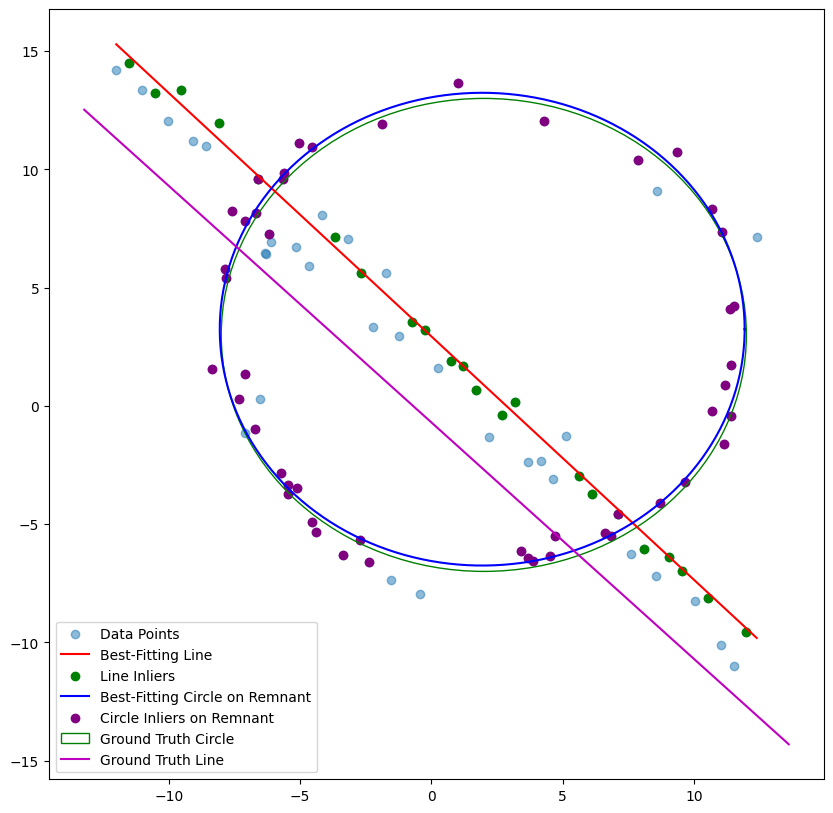

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to fit a line to a set of points given the line parameters (a, b, d)
def fit_line(a, b, d, points):
    x, y = points[:, 0], points[:, 1]
    distances = np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)
    return distances

# Define a function to calculate the distance from a point to the line
def distance_to_line(a, b, d, x, y):
    return np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

# Define a function to fit a circle to three points
def finding_circle(x1, y1, x2, y2, x3, y3):
    d = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    ux = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / d
    uy = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / d
    r = np.sqrt((x1 - ux)**2 + (y1 - uy)**2)
    return ux, uy, r

# Define RANSAC parameters for line fitting
max_iterations_line = 1000
threshold_line = 0.5
min_inliers_line = 20

# Define RANSAC parameters for circle fitting on the remnant
max_iterations_circle = 1000
threshold_circle = 1.0
min_inliers_circle = 20

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot for the data points
ax.scatter(X[:, 0], X[:, 1], label='Data Points', alpha=0.5)

# Initialize variables to store best line and circle parameters
best_line = None
best_inliers_line = []
best_circle_params = None
best_circle_inliers = []

# Implement RANSAC for line fitting
for _ in range(max_iterations_line):
    # Randomly select two points from the dataset
    sample_indices = np.random.choice(len(X), 2, replace=False)
    p1, p2 = X[sample_indices]

    # Fit a line to the two sampled points
    a = p2[1] - p1[1]
    b = p1[0] - p2[0]

    # Normalize the (a, b) vector to satisfy the constraint
    norm_ab = np.sqrt(a**2 + b**2)
    a /= norm_ab
    b /= norm_ab

    d = -(a * p1[0] + b * p1[1])

    # Calculate distances to the line for all points
    distances = fit_line(a, b, d, X)

    # Find inliers (points within the threshold)
    inliers = X[distances < threshold_line]

    # Check if the current consensus has more inliers than the best one
    if len(inliers) > len(best_inliers_line):
        best_line = (a, b, d)
        best_inliers_line = inliers

    # Check for termination based on the number of inliers
    if len(best_inliers_line) >= min_inliers_line:
        break

# Retrieve the best line parameters
a_line, b_line, d_line = best_line

# Plot the best-fitting line
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min_line = (-a_line * x_min - d_line) / b_line
y_max_line = (-a_line * x_max - d_line) / b_line
ax.plot([x_min, x_max], [y_min_line, y_max_line], color='red', label='Best-Fitting Line')

# Highlight inliers for the line
ax.scatter(best_inliers_line[:, 0], best_inliers_line[:, 1], c='green', label='Line Inliers')

# Implement RANSAC for circle fitting on the remnant
remnant_indices = np.setdiff1d(np.arange(len(X)), best_inliers_line)
remnant_x, remnant_y = X[remnant_indices][:, 0], X[remnant_indices][:, 1]

def distance(x0, y0, r, x, y):
    return np.abs(np.sqrt((x - x0)**2 + (y - y0)**2) - r)

# Function to fit a circle to points and calculate inliers
def fit_circle_ransac(points, N, threshold):
    best_circle = None
    best_inliers = []

    for _ in range(N):
        # Randomly select three points from the remnant dataset
        sample_indices = np.random.choice(len(points), 3, replace=False)
        p1, p2, p3 = points[sample_indices]

        # Fit a circle to the three sampled points
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        x0, y0, radius = finding_circle(x1, y1, x2, y2, x3, y3)

        # Calculate distances to the circle for all remnant points
        distances = distance(x0, y0, radius, points[:, 0], points[:, 1])

        # Find inliers (points within the threshold)
        inliers = points[distances < threshold]

        # Check if the current consensus has more inliers than the best one
        if len(inliers) > len(best_inliers):
            best_circle = (x0, y0, radius)
            best_inliers = inliers

        # Check for termination based on the number of inliers
        if len(best_inliers) >= min_inliers_circle:
            break

    return best_circle, best_inliers

# RANSAC circle fitting on the remnant
best_circle_params, best_circle_inliers = fit_circle_ransac(np.column_stack((remnant_x, remnant_y)), max_iterations_circle, threshold_circle)

# Retrieve the best circle parameters
x0_circle, y0_circle, radius_circle = best_circle_params

# Plot the best-fitting circle on the remnant
angle = np.linspace(0, 2 * np.pi, 360)
x_circle = x0_circle + radius_circle * np.cos(angle)
y_circle = y0_circle + radius_circle * np.sin(angle)
ax.plot(x_circle, y_circle, color='blue', label='Best-Fitting Circle on Remnant')

# Highlight inliers for the circle on the remnant
ax.scatter(best_circle_inliers[:, 0], best_circle_inliers[:, 1], c='purple', label='Circle Inliers on Remnant')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)

# Ground truth line
x_min_gt, x_max_gt = ax.get_xlim()
x_gt = np.array([x_min_gt, x_max_gt])
y_gt = m * x_gt + b
ax.plot(x_gt, y_gt, color='m', label='Ground Truth Line')

# Set legend
ax.legend()

# Show the plot
plt.show()


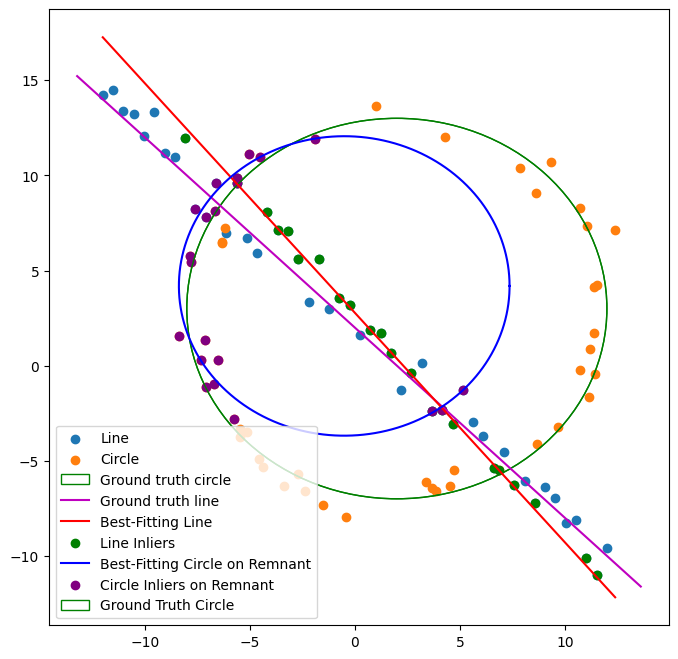

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate data for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x_circ = x0_gt + (r + n) * np.cos(t)
y_circ = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x_circ.reshape(half_n, 1), y_circ.reshape(half_n, 1)))

# Generate data for the line
s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine data points
X = np.vstack((X_circ, X_line))

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')

# Scatter plot for the circle
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Ground truth line
x_min, x_max = ax.get_xlim()
x_gt = np.array([x_min, x_max])
y_gt = m * x_gt + b
plt.plot(x_gt, y_gt, color='m', label='Ground truth line')

# Define a function to fit a line to a set of points given the line parameters (a, b, d)
def fit_line(a, b, d, points):
    x, y = points[:, 0], points[:, 1]
    distances = np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)
    return distances

# Define a function to calculate the distance from a point to the line
def distance_to_line(a, b, d, x, y):
    return np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

# Define a function to fit a circle to three points
def finding_circle(x1, y1, x2, y2, x3, y3):
    d = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    ux = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / d
    uy = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / d
    r = np.sqrt((x1 - ux)**2 + (y1 - uy)**2)
    return ux, uy, r

# Define RANSAC parameters for line fitting
max_iterations_line = 1000
threshold_line = 0.5
min_inliers_line = 20

# Define RANSAC parameters for circle fitting on the remnant
max_iterations_circle = 1000
threshold_circle = 1.0
min_inliers_circle = 20

# Initialize variables to store best line and circle parameters
best_line = None
best_inliers_line = []
best_circle_params = None
best_circle_inliers = []

# Implement RANSAC for line fitting
for _ in range(max_iterations_line):
    # Randomly select two points from the dataset
    sample_indices = np.random.choice(len(X), 2, replace=False)
    p1, p2 = X[sample_indices]

    # Fit a line to the two sampled points
    a = p2[1] - p1[1]
    b = p1[0] - p2[0]

    # Normalize the (a, b) vector to satisfy the constraint
    norm_ab = np.sqrt(a**2 + b**2)
    a /= norm_ab
    b /= norm_ab

    d = -(a * p1[0] + b * p1[1])

    # Calculate distances to the line for all points
    distances = fit_line(a, b, d, X)

    # Find inliers (points within the threshold)
    inliers = X[distances < threshold_line]

    # Check if the current consensus has more inliers than the best one
    if len(inliers) > len(best_inliers_line):
        best_line = (a, b, d)
        best_inliers_line = inliers

    # Check for termination based on the number of inliers
    if len(best_inliers_line) >= min_inliers_line:
        break

# Retrieve the best line parameters
a_line, b_line, d_line = best_line

# Plot the best-fitting line
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min_line = (-a_line * x_min - d_line) / b_line
y_max_line = (-a_line * x_max - d_line) / b_line
ax.plot([x_min, x_max], [y_min_line, y_max_line], color='red', label='Best-Fitting Line')

# Highlight inliers for the line
ax.scatter(best_inliers_line[:, 0], best_inliers_line[:, 1], c='green', label='Line Inliers')

# Implement RANSAC for circle fitting on the remnant
remnant_indices = np.setdiff1d(np.arange(len(X)), best_inliers_line)
remnant_x, remnant_y = X[remnant_indices][:, 0], X[remnant_indices][:, 1]

def distance(x0, y0, r, x, y):
    return np.abs(np.sqrt((x - x0)**2 + (y - y0)**2) - r)

# Implement RANSAC for circle fitting on the remnant
remnant_indices = np.setdiff1d(np.arange(len(X)), best_inliers_line)
remnant_x, remnant_y = X[remnant_indices][:, 0], X[remnant_indices][:, 1]

def distance(x0, y0, r, x, y):
    return np.abs(np.sqrt((x - x0)**2 + (y - y0)**2) - r)

# Function to fit a circle to points and calculate inliers
def fit_circle_ransac(points, N, threshold):
    best_circle = None
    best_inliers = []

    for _ in range(N):
        # Randomly select three points from the remnant dataset
        sample_indices = np.random.choice(len(points), 3, replace=False)
        p1, p2, p3 = points[sample_indices]

        # Fit a circle to the three sampled points
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        x0, y0, radius = finding_circle(x1, y1, x2, y2, x3, y3)

        # Calculate distances to the circle for all remnant points
        distances = distance(x0, y0, radius, points[:, 0], points[:, 1])

        # Find inliers (points within the threshold)
        inliers = points[distances < threshold]

        # Check if the current consensus has more inliers than the best one
        if len(inliers) > len(best_inliers):
            best_circle = (x0, y0, radius)
            best_inliers = inliers

        # Check for termination based on the number of inliers
        if len(best_inliers) >= min_inliers_circle:
            break

    return best_circle, best_inliers

# RANSAC circle fitting on the remnant
best_circle_params, best_circle_inliers = fit_circle_ransac(np.column_stack((remnant_x, remnant_y)), max_iterations_circle, threshold_circle)

# Retrieve the best circle parameters
x0_circle, y0_circle, radius_circle = best_circle_params

# Plot the best-fitting circle on the remnant
angle = np.linspace(0, 2 * np.pi, 360)
x_circle = x0_circle + radius_circle * np.cos(angle)
y_circle = y0_circle + radius_circle * np.sin(angle)
ax.plot(x_circle, y_circle, color='blue', label='Best-Fitting Circle on Remnant')

# Highlight inliers for the circle on the remnant
ax.scatter(best_circle_inliers[:, 0], best_circle_inliers[:, 1], c='purple', label='Circle Inliers on Remnant')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)

# Set legend
ax.legend()

# Show the plot
plt.show()
